KeyboardInterrupt: 

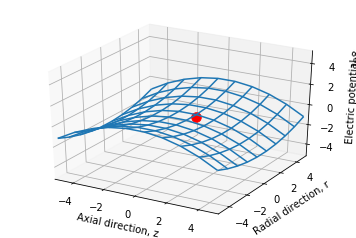

In [197]:
#a simulation of a particle in a quadrupolar field 
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from IPython import display
import time
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-5,5,10)
Xv, Yv = np.meshgrid(x,x)
t = 0 #initial time

Vo = 100.#potential
q = 30 #charge
m = 1.0E6 #mass
zo = 0.00296 #geometric parameter
Omeg = 2*math.pi*1000 #trap frequency

f = 0.01 #friction

z0 = 0 #initial z position
z1 = 0.2 #next z position

r0 = 0 #inital r position
r1 = 0.2 #next r position

dt = 0.0001 #time increment
while True:
    #numerically solve for the next positions of the particle
    z2 = (-2*Vo*q*math.cos(Omeg*t)*z1/zo**2-f)*(dt*2/m)+2*z1-z0
    r2 = (Vo*q*math.cos(Omeg*t)*r1/zo**2-f)*(dt*2/m)+2*r1-r0
    vp = v*(2*z1**2-r1**2)/2/0.00296**2 #determine the potential at z1 r1
    
    ax.clear()
    
    
    v = Vo*math.cos(Omeg*t) #calculate the potential at the moment
    v_paul = v*(2*Xv**2-Yv**2)/2/0.00296**2 #calculate the field
    
    ax.plot_wireframe(Xv,Yv,v_paul) #plot field
    ax.scatter(z1,r1,vp, s=90,c='r') #plot particle
    ax.set_xlim(-5,5)
    ax.set_ylim(-5,5)
    ax.set_zlim(-5.0E8,5.0E8)
    ax.set_xlabel('Axial direction, z')
    ax.set_ylabel('Radial direction, r')
    ax.set_zlabel('Electric potential')
    t += dt #increment time
    display.display(plt.gcf())
    display.clear_output(wait=True)
    #update positions
    z0 = z1 
    z1 = z2
    r0 = r1
    r1 = r2
    
